# Calculation of molar extinction coefficients of gold nanospheres

In this notebook, we illustrate how to calculate extinction coefficients of gold nanoparticles using `miniMie`. Detailed explanations can be found in our paper [*Analyst* **2013**, *138*, 583-592](https://dx.doi.org/10.1039/c2an36135c), and the references cited therein.

First, the tradtional imports.

In [1]:
import numpy as np
from numpy import pi, log
import matplotlib.pyplot as plt

`miniMie` contains a function called ``Mie_spectrum`` that calculates optical spectra using Mie theory, given a vector/array of wavelengths.

The required dielectric function is evaluated through a specific material class (here, ``JC_gold`` which is gold as described by Johnson & Christy).

In [2]:
from miniMie import Mie_spectrum, JC_gold

We will take a gold nanoparticle of 50 nm diameter (radius 25 nm).

In [3]:
d_nm = 50.
r_nm = d_nm/2.0
mat = JC_gold()

We define a range of wavelengths for which we desire the cross sections. Here, we cover 380 ... 1000 nm.

In [4]:
wavelens = np.linspace(380., 1000., 1000)

`Mie_spectrum` returns the Mie extinction and scattering cross sections for these wavelengths. They are designated as $Q_\textrm{ext}$ and $Q_\textrm{sca}$, respectively, and are the optical cross sections relative to the geometrical cross sections.

The default settings for the Mie calculation in `Mie_spectrum` are that the nanospheres are made of gold (Johnson & Christy dielectric function without mean-free path correction), and that the embedding medium has a refractive index of 1.33 (*e.g.*, water).

In [5]:
(Q_ext, Q_sca) = Mie_spectrum(wavelens, d_nm, material=mat)

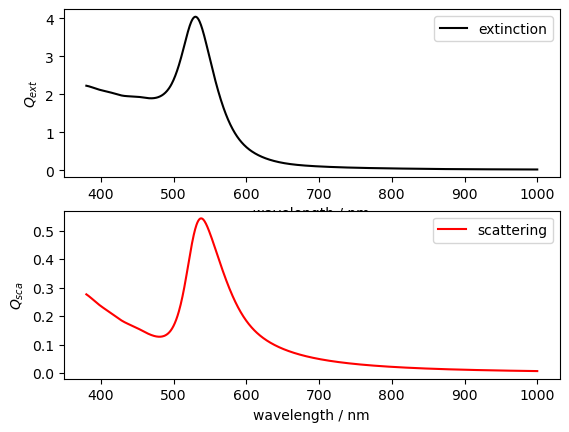

In [6]:
plt.figure()
plt.subplot(211)
plt.plot(wavelens, Q_ext, 'k-', label='extinction')
plt.xlabel('wavelength / nm')
plt.ylabel('$Q_{ext}$')
plt.legend()
plt.subplot(212)
plt.plot(wavelens, Q_sca, 'r-', label='scattering')
plt.xlabel('wavelength / nm')
plt.ylabel('$Q_{sca}$')
plt.legend()

The relative cross sections can be converted into absolute cross sections by multiplying with the geometrical cross section.

$$\sigma_{\textrm ext} = \pi r^2 Q_{\textrm ext}$$

$$\sigma_{\textrm sca} = \pi r^2 Q_{\textrm sca}$$

In [7]:
sig_ext = Q_ext * pi * r_nm**2
sig_sca = Q_sca * pi * r_nm**2

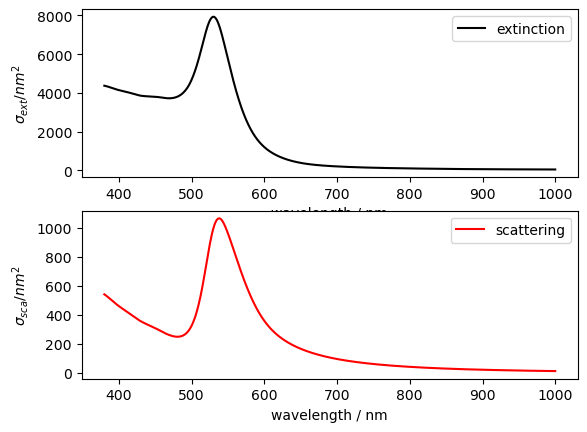

In [8]:
plt.figure()
plt.subplot(211)
plt.plot(wavelens, sig_ext, 'k-', label='extinction')
plt.xlabel('wavelength / nm')
plt.ylabel('$\sigma_{ext} / nm^2$')
plt.legend()
plt.subplot(212)
plt.plot(wavelens, sig_sca, 'r-', label='scattering')
plt.xlabel('wavelength / nm')
plt.ylabel('$\sigma_{sca} / nm^2$')
plt.legend()

## Molar extinction coefficient

The extinction cross section $\sigma_{ext}$ \[nm$^{2}$\] is readily converted into the molar extinction coefficient \[M$^{-1}$ cm$^{-1}$\] so much appreciated (and rightly so!) by chemists and biologists, using Avogadro's number $N_A$.

$$\varepsilon = \frac{10^{-17} N_A }{\ln 10} \sigma_{ext} $$

In [9]:
N_A = 6.022e23

In [10]:
epsilon = sig_ext * (N_A * 1e-17)/log(10)

Text(0.5, 1.0, 'gold nanospheres (50.0 nm diam.)')

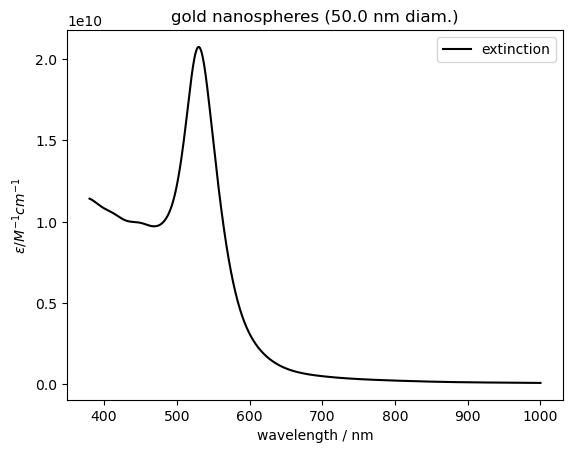

In [11]:
plt.plot(wavelens, epsilon, 'k-', label='extinction')
plt.xlabel('wavelength / nm')
plt.ylabel('$\epsilon / M^{-1} cm^{-1}$')
plt.legend()
plt.title('gold nanospheres ({0:.1f} nm diam.)'.format(d_nm))

Here, we find the maximum using a simple `argmax`. We are aware that there are better methods for finding the maximum, but for this is sufficient for a simple demonstration.

In [12]:
maxi = np.argmax(epsilon)
print('lambda_max = {0:4.1f} nm'.format(wavelens[maxi]))
print('epsilon_max = {0:5.2e} M-1 cm-1'.format(epsilon[maxi]))

lambda_max = 530.2 nm
epsilon_max = 2.08e+10 M-1 cm-1
